# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')

# Pegando os autores que mais fizeram mudanças no geral no decorrer do projeto todo
esse gráfico vai ser servir como referência para futuras pesquisas, pois é possível determinar um peso para médias futuras em determinado arquivos, 
com alguns autores tendo um peso diferente caso exista um arquivo especifico que seja feita alguma análise

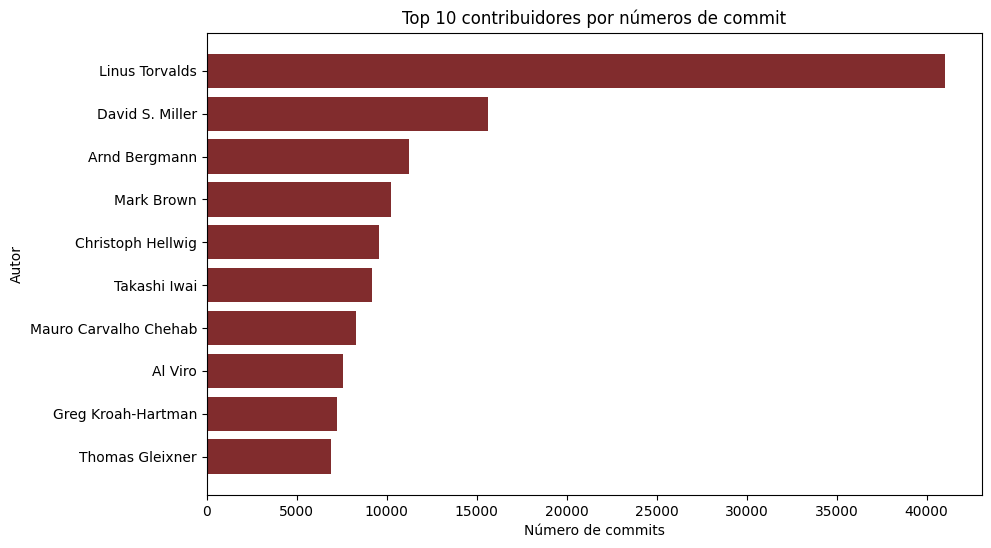

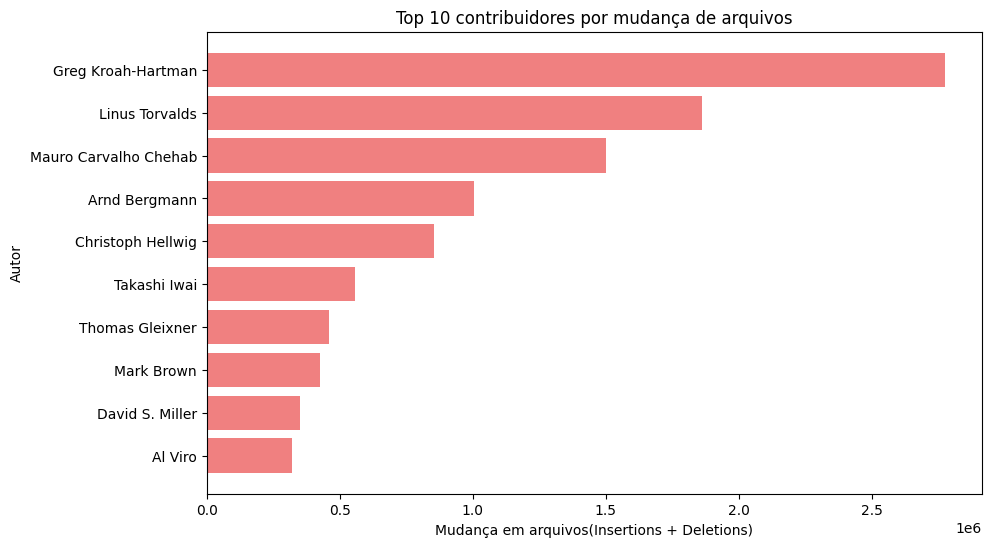

In [3]:
author_commit_counts = db.groupby('author').size().reset_index(name='commit_count')
top_authors_by_commits = author_commit_counts.sort_values(by='commit_count', ascending=False).head(10)

author_changes = db.groupby('author').agg({
    'insertions': 'sum',
    'deletions': 'sum'
}).reset_index()

author_stats = pd.merge(top_authors_by_commits, author_changes, on='author')
author_stats['total_changes'] = author_stats['insertions'] + author_stats['deletions']
top_authors_by_changes = author_stats.sort_values(by='total_changes', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_authors_by_commits['author'], top_authors_by_commits['commit_count'], color='#812c2dff')
plt.xlabel('Número de commits')
plt.ylabel('Autor')
plt.title('Top 10 contribuidores por números de commit')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_authors_by_changes['author'], top_authors_by_changes['total_changes'], color='lightcoral')
plt.xlabel('Mudança em arquivos(Insertions + Deletions)')
plt.ylabel('Autor')
plt.title('Top 10 contribuidores por mudança de arquivos')
plt.gca().invert_yaxis()
plt.show()


# Arquivo com maior número de mudanças

In [4]:
exploding = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
exploded = exploding.explode('files_changed')

file_changes = exploded.groupby('files_changed').agg({
    'modified_files': 'size',  
    'insertions': 'sum',       
    'deletions': 'sum'         
}).reset_index()
most_changed_files = file_changes.sort_values(by='modified_files', ascending=False)
print(most_changed_files.head(10))

                                            files_changed  modified_files  \
353611                                                 []          127117   
26270                                     ['MAINTAINERS']            7015   
145666           ['drivers/gpu/drm/i915/intel_display.c']            1934   
334355                  ['sound/pci/hda/patch_realtek.c']            1934   
280666                                  ['fs/io_uring.c']            1735   
26576                                        ['Makefile']            1462   
131051  ['drivers/gpu/drm/amd/display/amdgpu_dm/amdgpu...             951   
103879                             ['arch/x86/kvm/x86.c']             932   
273371                               ['fs/btrfs/inode.c']             928   
321050                                ['mm/page_alloc.c']             916   

        insertions  deletions  
353611           0          0  
26270        34146      18464  
145666       25124      18835  
334355       37821      

In [5]:
exploding = pd.read_csv('dataframe/linux_kernel_commits_no_merge.csv')
exploded = exploding.explode('files_changed')

file_changes = exploded.groupby('files_changed').agg({
    'modified_files': 'size',  
    'insertions': 'sum',       
    'deletions': 'sum'         
}).reset_index()
most_changed_files = file_changes.sort_values(by='modified_files', ascending=False)
print(most_changed_files.head(15))

                                            files_changed  modified_files  \
26270                                     ['MAINTAINERS']            7015   
334355                  ['sound/pci/hda/patch_realtek.c']            1934   
145666           ['drivers/gpu/drm/i915/intel_display.c']            1934   
280666                                  ['fs/io_uring.c']            1735   
26576                                        ['Makefile']            1462   
131051  ['drivers/gpu/drm/amd/display/amdgpu_dm/amdgpu...             951   
103879                             ['arch/x86/kvm/x86.c']             932   
273371                               ['fs/btrfs/inode.c']             928   
321050                                ['mm/page_alloc.c']             916   
145983                ['drivers/gpu/drm/i915/intel_pm.c']             880   
144631                ['drivers/gpu/drm/i915/i915_gem.c']             872   
103733                             ['arch/x86/kvm/vmx.c']             839   

# Média de mudanças por ano

In [18]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
db['date'] = db['date'].str[:-6]
db['date'] = pd.to_datetime(db['date'], format='%a %b %d %H:%M:%S %Y', errors='coerce')
db = db.dropna(subset=['date'])
db['year'] = db['date'].dt.year
files = db.groupby('year')['modified_files'].mean().reset_index()

print(files)


    year  modified_files
0   1970        1.000000
1   2001        9.000000
2   2002        3.250000
3   2003        1.000000
4   2004        1.764706
5   2005        3.073196
6   2006        2.807209
7   2007        2.559630
8   2008        2.417057
9   2009        2.263464
10  2010        2.377714
11  2011        2.390996
12  2012        2.200572
13  2013        1.903153
14  2014        1.877817
15  2015        1.892714
16  2016        1.960029
17  2017        2.105178
18  2018        1.989251
19  2019        2.161098
20  2020        1.920996
21  2021        1.833306
22  2022        1.861664
23  2023        1.840951
24  2024        1.761144
25  2037        1.000000
26  2077        1.000000
27  2085        1.000000


In [ ]:
import pandas as pd

db['date'] = pd.to_datetime(db['date'], errors='coerce')
db['year'] = db['date'].dt.year
files = db.groupby('year')['deletions'].sum().reset_index()
print(files)

      year  deletions
0   2005.0      50277
1   2006.0      73263
2   2007.0     188185
3   2008.0     244560
4   2009.0     601449
5   2010.0     677389
6   2011.0     485020
7   2012.0     217187
8   2013.0     217233
9   2014.0     301442
10  2015.0     317840
11  2016.0     260921
12  2017.0     307692
13  2018.0     544783
14  2019.0     659673
15  2020.0     455355
16  2021.0     415228
17  2022.0     522084
18  2023.0     392336
19  2024.0     142348
20  2037.0         23
21  2077.0          4


# Alterações perto de mudança de versões, nesse caso 5.15

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

db['date'] = pd.to_datetime(db['date'], errors='coerce')
filtered_data = db[(db['date'].dt.year == 2021) & (db['date'].dt.month.isin([8,9, 10, 11,12]))]


data = pd.read_csv('dataframe/5.15_release_timestamp.csv')

print(filtered_data)
filtered_data.to_csv('5.15_release_timestamp.csv', index=False)


                                            hash                author  \
78822   21ca59b365c091d583f36ac753eaa8baf947be6f     Christian Brauner   
78823   1c5976ef0f7ad76319df748ccb99a4c7ba2ba464     Christian Brauner   
83117   e2d3e77d0e7d3caf676cb0eb707f8c7b0a4d41b9  Jean-Michel Hautbois   
140766  d58ac89d0d388da82630bb9d3823420cddbdabb2     Marc Kleine-Budde   
145746  5b0d85b379747b09d8b4630fdb5c8a8d74122f0f        Tomi Valkeinen   
...                                          ...                   ...   
277402  79e48a21045e6f2ccd9f59737685336d9ad75d54         Arnd Bergmann   
277442  ec343111c056ec3847800302f6dbc57281f833fa         Linus Walleij   
277461  01099b1ad9101ca3f41071a87b9c496d9ea1d2ad          Takashi Iwai   
277463  eda80d7c9c4db0f55f130e38c682e19b58d5add7          Takashi Iwai   
277481  fe2fc0fd379371af510caf39181460f2eed4c35b         Linus Walleij   

                                       email                      date  \
78822           christian.brauner@ubu

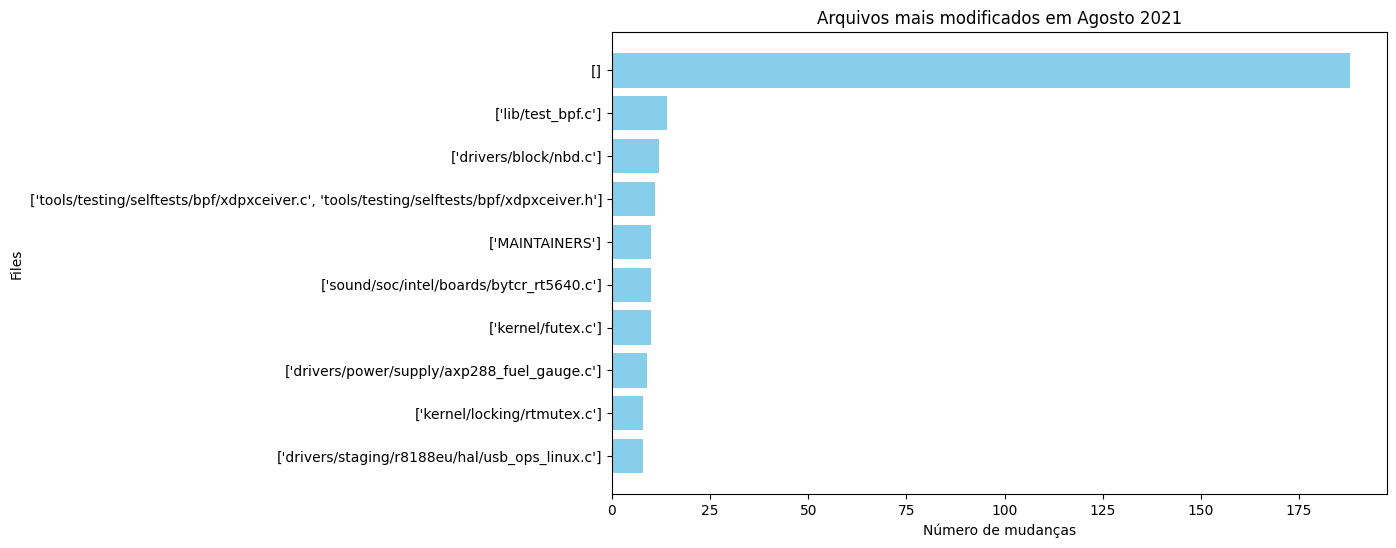

Arquivos inseridos em Agosto 2021: 1078


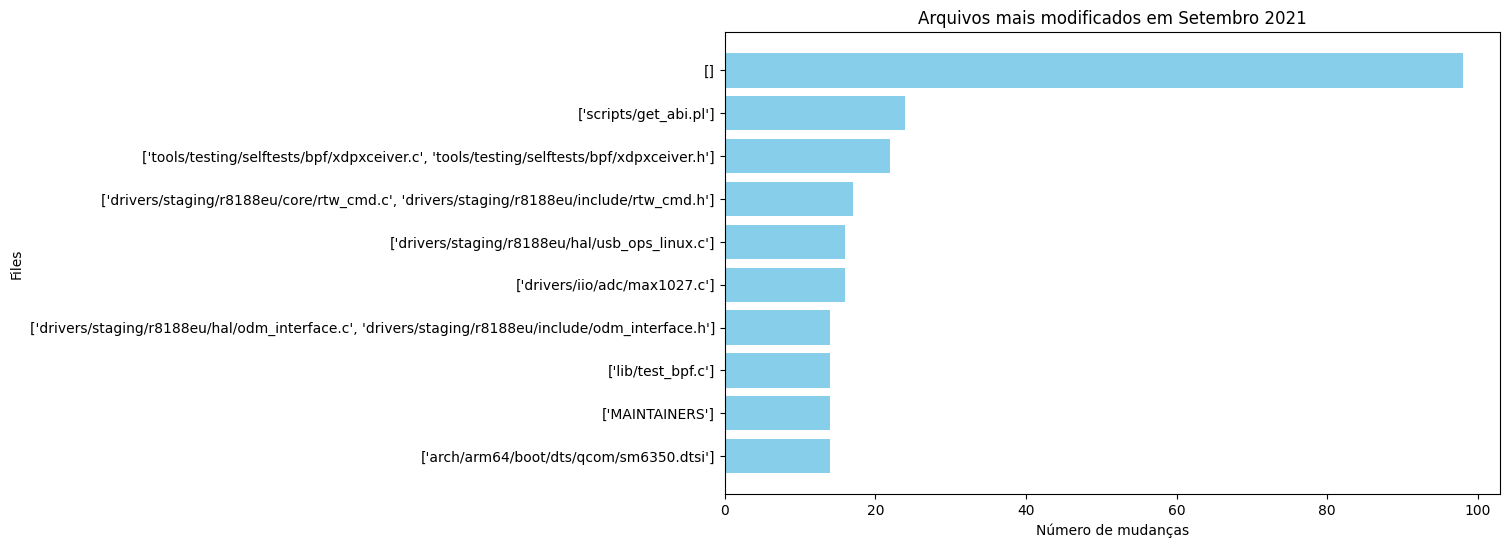

Arquivos inseridos em Setembro 2021: 1216


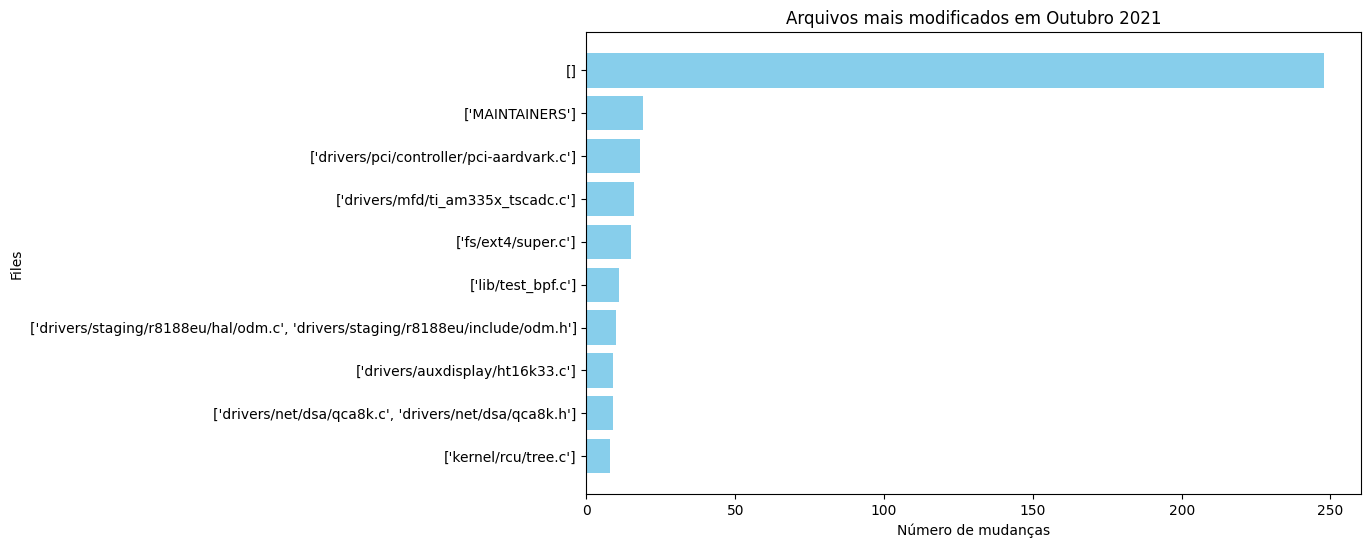

Arquivos inseridos em Outubro 2021: 1270


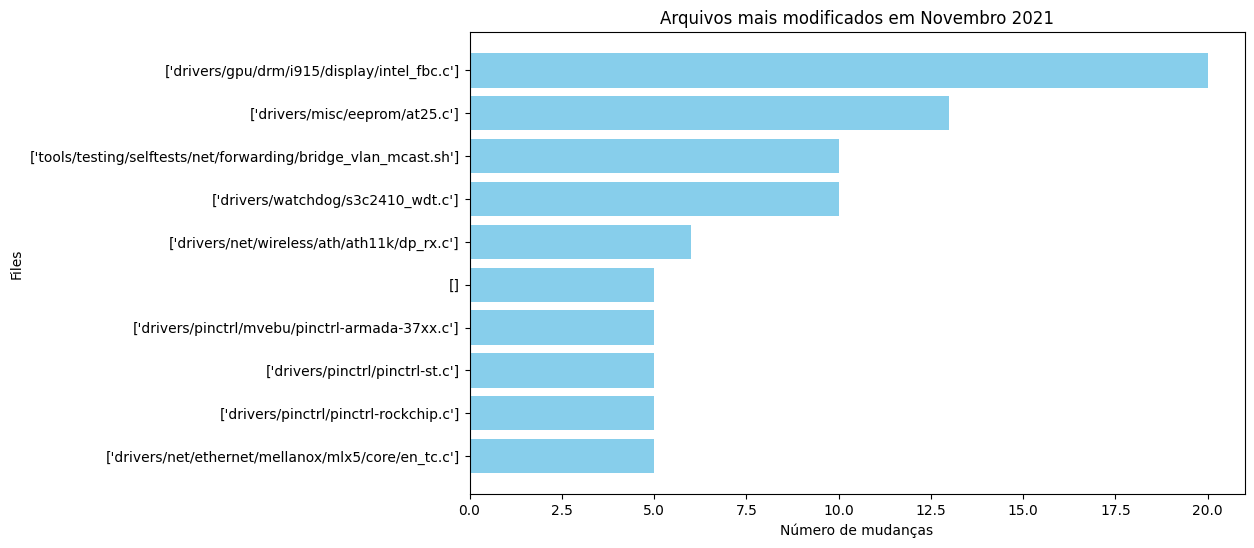

Arquivos inseridos em Novembro 2021: 358


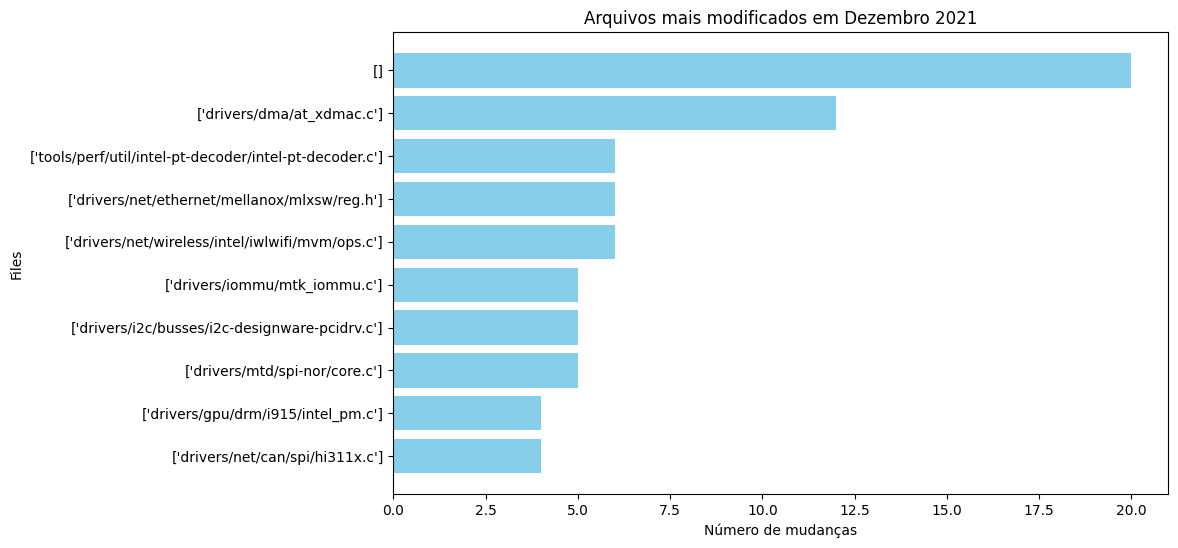

Arquivos inseridos em Dezembro 2021: 458


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('dataframe/5.15_release_timestamp.csv')

data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['month'] = data['date'].dt.month

def plot_changes_by_month(data, month, month_name):
    month_data = data[data['month'] == month]

    exploded_data = month_data.explode('files_changed')
    file_changes = exploded_data.groupby('files_changed').agg({
        'modified_files': 'size', 
        'insertions': 'sum',       
        'deletions': 'sum'         
    }).reset_index()

    most_changed_files = file_changes.sort_values(by='modified_files', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(most_changed_files['files_changed'], most_changed_files['modified_files'], color='skyblue')
    plt.xlabel('Número de mudanças')
    plt.ylabel('Files')
    plt.title(f'Arquivos mais modificados em {month_name} 2021')
    plt.gca().invert_yaxis()
    plt.show()

    inserted_files = len(file_changes[file_changes['insertions'] > 0])
    print(f"Arquivos inseridos em {month_name} 2021: {inserted_files}")

plot_changes_by_month(data, 8, 'Agosto')
plot_changes_by_month(data, 9, 'Setembro')
plot_changes_by_month(data, 10, 'Outubro')
plot_changes_by_month(data, 11, 'Novembro')
plot_changes_by_month(data, 12, 'Dezembro')



o código a seguir foi utilizado do chatGPT para auxiliar a análise:

C:\Users\carlo\AppData\Local\Temp\ipykernel_10760\3290994644.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


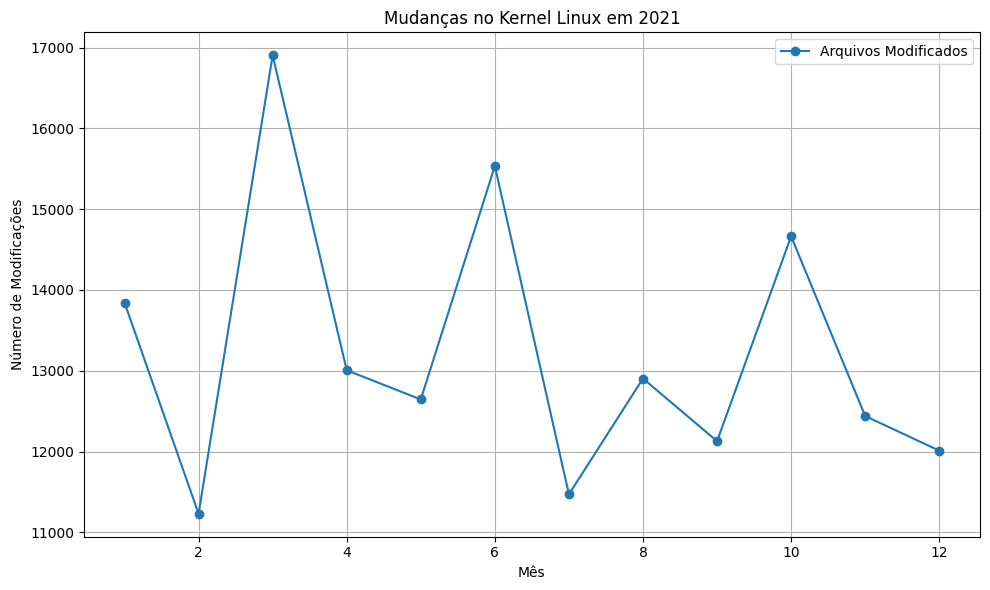

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].apply(lambda x: str(x.year) if pd.notnull(x) else None)
data['month'] = data['date'].apply(lambda x: x.month if pd.notnull(x) else None)
data_2021 = data[data['year'] == '2021']
monthly_changes = data_2021.groupby('month').agg({
    'insertions': 'sum',
    'deletions': 'sum',
    'modified_files': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_changes['month'], monthly_changes['insertions'], label='Inserções', marker='o')
plt.plot(monthly_changes['month'], monthly_changes['deletions'], label='Deleções', marker='o')
plt.plot(monthly_changes['month'], monthly_changes['modified_files'], label='Arquivos Modificados', marker='o')
month_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.xlabel('Mês')
plt.ylabel('Número de Modificações')
plt.title('Mudanças no Kernel Linux em 2021')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# entendendo o []

In [ ]:
import pandas as pd
db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
empty_files_commits = db[db['files_changed'] == '[]']
print(empty_files_commits[['hash', 'author', 'date', 'message']])
empty_files_commits = db[db['files_changed'] == '[]']
empty_files_info = empty_files_commits[['hash', 'author', 'date', 'message']]
empty_files_info.to_csv('empty_files_commits.csv', index=False)

                                             hash           author  \
0        a940d9a43e623d1ba1e5c499aa843516656c0ae4   Linus Torvalds   
1        38ea77ab07480fa57a80bbdc2706ab2807ebc9e6   Linus Torvalds   
2        b8979c6b4d0d1b36e94f5bc483fd86e38107e554   Linus Torvalds   
3        7b17f5ebd5fc5e9275eaa5af3d0771f2a7b01bbf   Linus Torvalds   
4        303ba85c60442ecdca77231f227126a83ba39bd3   Linus Torvalds   
...                                           ...              ...   
1320758  7f907d7486f2519c2ff1493bfbcdc36dcacd85b7   Linus Torvalds   
1320761  0b2cad2f30d0353f2576b1a2207c0792ba713157   Linus Torvalds   
1320775  c46f2ffb9e7fce7208c2639790e1ade42e00b146  James Bottomley   
1320797  a4e884a311893b476893739901bed382cd62b4fe   Linus Torvalds   
1320798  ce1dc02f76432a46db149241e015a4f782974623   Linus Torvalds   

                                   date  \
0        Tue Sep 17 11:41:47 2024 +0200   
1        Tue Sep 17 10:53:21 2024 +0200   
2        Tue Sep 17 10:48:09 2

In [ ]:
import pandas as pd
data = pd.read_csv('empty_files_commits.csv')

#tentando buscar informação em um hash "vazio"
hashes = [
    "a940d9a43e623d1ba1e5c499aa843516656c0ae4",
    "38ea77ab07480fa57a80bbdc2706ab2807ebc9e6",
    "b8979c6b4d0d1b36e94f5bc483fd86e38107e554",
    "7b17f5ebd5fc5e9275eaa5af3d0771f2a7b01bbf",
    "303ba85c60442ecdca77231f227126a83ba39bd3"
]

specific_hash = '7b17f5ebd5fc5e9275eaa5af3d0771f2a7b01bbf'

hash_info = data[data['hash'] == specific_hash]

if not hash_info.empty:
    print(hash_info)
    if 'insertions' in hash_info.columns and 'deletions' in hash_info.columns:
        hash_info[['insertions', 'deletions']].plot(kind='bar', title=f'Inserções e Deleções para {specific_hash}')
        plt.ylabel('Número de Alterações')
        plt.show()
else:
    print(f"vazio {specific_hash}")



Informações do Hash Específico:
                                       hash          author  \
3  7b17f5ebd5fc5e9275eaa5af3d0771f2a7b01bbf  Linus Torvalds   

                        date  \
3  2024-09-17 10:41:21+02:00   

                                             message  
3  Merge tag 'soc-dt-6.12' of git://git.kernel.or...  


# Tirando arquivos "vazios"

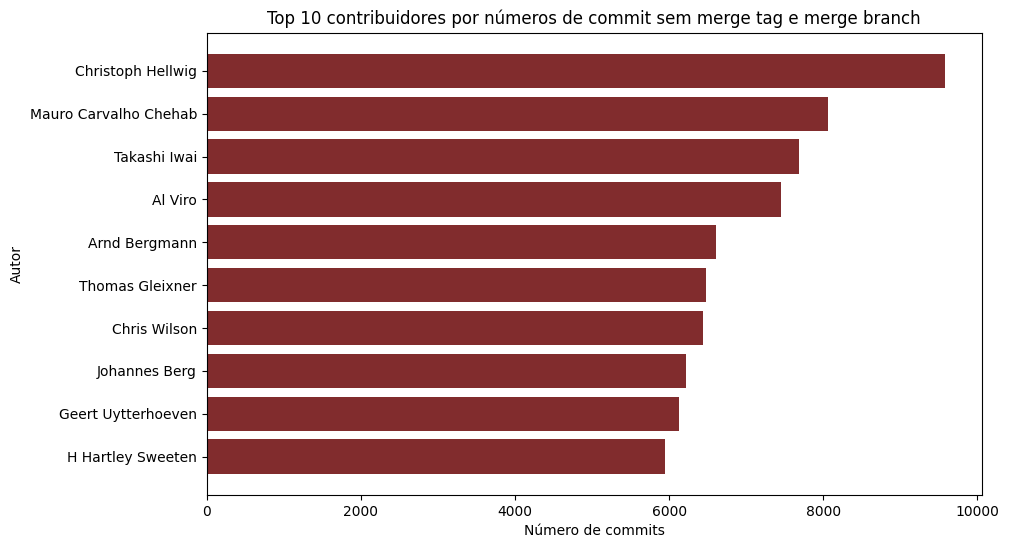

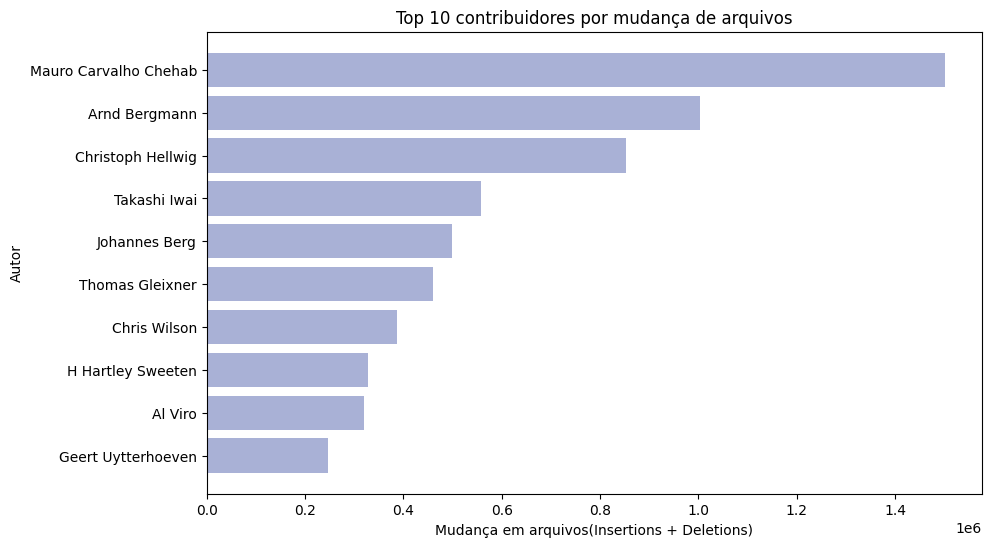

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db = pd.read_csv('dataframe/linux_kernel_commits_no_merge.csv')

author_commit_counts = db.groupby('author').size().reset_index(name='commit_count')
author_commit_counts = db.groupby('author').size().reset_index(name='commit_count')
top_authors_by_commits = author_commit_counts.sort_values(by='commit_count', ascending=False).head(10)

author_changes = db.groupby('author').agg({
    'insertions': 'sum',
    'deletions': 'sum'
}).reset_index()

author_stats = pd.merge(top_authors_by_commits, author_changes, on='author')
author_stats['total_changes'] = author_stats['insertions'] + author_stats['deletions']
top_authors_by_changes = author_stats.sort_values(by='total_changes', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_authors_by_commits['author'], top_authors_by_commits['commit_count'], color='#812c2dff')
plt.xlabel('Número de commits')
plt.ylabel('Autor')
plt.title('Top 10 contribuidores por números de commit sem merge tag e merge branch')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_authors_by_changes['author'], top_authors_by_changes['total_changes'], color='#a9b1d6ff')
plt.xlabel('Mudança em arquivos(Insertions + Deletions)')
plt.ylabel('Autor')
plt.title('Top 10 contribuidores por mudança de arquivos')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
exploding = pd.read_csv('dataframe/linux_kernel_commits_no_merge.csv')
exploded = exploding.explode('files_changed')

file_changes = exploded.groupby('files_changed').agg({
    'modified_files': 'size',  
    'insertions': 'sum',       
    'deletions': 'sum'         
}).reset_index()
most_changed_files = file_changes.sort_values(by='modified_files', ascending=False)
print(most_changed_files.head(10))

                                            files_changed  modified_files  \
26270                                     ['MAINTAINERS']            7015   
334355                  ['sound/pci/hda/patch_realtek.c']            1934   
145666           ['drivers/gpu/drm/i915/intel_display.c']            1934   
280666                                  ['fs/io_uring.c']            1735   
26576                                        ['Makefile']            1462   
131051  ['drivers/gpu/drm/amd/display/amdgpu_dm/amdgpu...             951   
103879                             ['arch/x86/kvm/x86.c']             932   
273371                               ['fs/btrfs/inode.c']             928   
321050                                ['mm/page_alloc.c']             916   
145983                ['drivers/gpu/drm/i915/intel_pm.c']             880   

        insertions  deletions  
26270        34146      18464  
334355       37821      19082  
145666       25124      18835  
280666       24688      

o código a seguir foi utilizado do chatGPT para auxiliar a análise:

In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')

commits_sem_files_changed = db[db['files_changed'] == '[]']
contagem_por_autor = commits_sem_files_changed['author'].value_counts()
mais_recente_por_autor = commits_sem_files_changed.groupby('author').apply(lambda x: x.sort_values('date', ascending=False).iloc[0])
print("Contagem de commits por autor onde 'files_changed' é '[]'(merge tags):")
print(contagem_por_autor)


Contagem de commits por autor onde 'files_changed' é '[]'(merge tags):
author
Linus Torvalds       38353
David S. Miller      11575
Mark Brown            5009
Arnd Bergmann         4649
Dave Airlie           3548
                     ...  
Rudolf Marek             1
Markus Rechberger        1
Michael Buesch           1
KaiGai Kohei             1
Auke Kok                 1
Name: count, Length: 7122, dtype: int64


C:\Users\carlo\AppData\Local\Temp\ipykernel_10760\3428365400.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mais_recente_por_autor = commits_sem_files_changed.groupby('author').apply(lambda x: x.sort_values('date', ascending=False).iloc[0])


In [ ]:
db['date'] = pd.to_datetime(db['date'], errors='coerce')

db = db.dropna(subset=['date'])
wednesday_sept_9 = db[(db['date'].dt.weekday == 2) & (db['date'].dt.month == 9) & (db['date'].dt.day == 9)]
count_sept_9 = wednesday_sept_9.shape[0]
count_other_dates = db.shape[0] - count_sept_9

print("setembro 9:", count_sept_9)
print("outros dias:", count_other_dates)



setembro 9: 157
outros dias: 231552


In [ ]:
db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
top_authors_total_commits = db['author'].value_counts().nlargest(20)
top_authors = top_authors_total_commits.index
top_authors_df = db[db['author'].isin(top_authors)]

first_commits = top_authors_df.sort_values(by=['author', 'date']).drop_duplicates(subset=['author'], keep='first')
latest_commits = top_authors_df.sort_values(by=['author', 'date'], ascending=[True, False]).drop_duplicates(subset=['author'], keep='first')

top_authors_total_commits = top_authors_total_commits.reset_index()
top_authors_total_commits.columns = ['author', 'total_commits']
top_authors_summary = first_commits.merge(latest_commits, on='author', suffixes=('_first', '_latest')).merge(top_authors_total_commits, on='author')
top_authors_summary = top_authors_summary[['author', 'total_commits', 'date_first','date_latest']]
print(top_authors_summary)


                   author  total_commits                      date_first  \
0                 Al Viro           7575  Fri Apr 11 12:01:03 2014 -0400   
1         Andy Shevchenko           5470   Fri Apr 1 13:35:52 2022 +0300   
2           Arnd Bergmann          11257   Fri Apr 1 14:35:42 2022 +0200   
3            Chris Wilson           6472  Fri Apr 10 09:16:38 2020 +0100   
4       Christoph Hellwig           9587  Fri Apr 10 14:31:47 2020 +0200   
5           Dan Carpenter           5284   Fri Apr 1 14:04:23 2016 +0300   
6         David S. Miller          15614   Fri Apr 1 12:01:38 2022 +0100   
7      Geert Uytterhoeven           6460   Fri Apr 1 16:09:28 2022 +0200   
8      Greg Kroah-Hartman           7263  Fri Apr 10 11:18:49 2015 +0200   
9       H Hartley Sweeten           5942  Fri Apr 12 09:58:45 2013 -0700   
10            Ingo Molnar           6136   Fri Apr 1 09:00:35 2016 +0200   
11          Johannes Berg           6272   Fri Apr 1 13:52:34 2011 +0200   
12    Krzysz

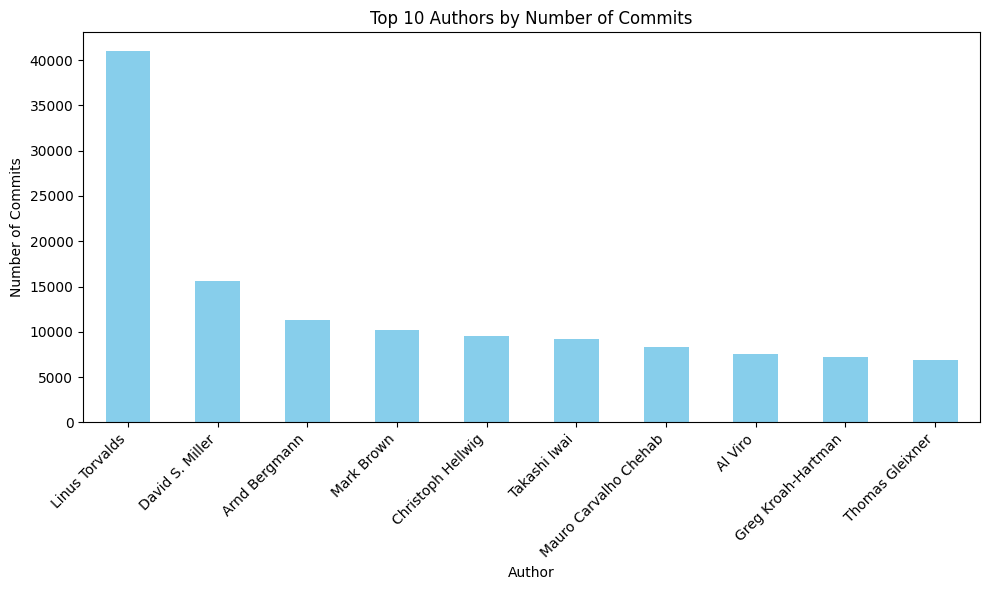

In [ ]:
import matplotlib.pyplot as plt

top_authors = db['author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors by Number of Commits')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
top_authors_total_commits = db['author'].value_counts().nlargest(10).sort_values(ascending=True)
top_authors = top_authors_total_commits.index
top_authors_df = db[db['author'].isin(top_authors)]
first_commits = top_authors_df.sort_values(by=['author', 'date']).drop_duplicates(subset=['author'], keep='first')
latest_commits = top_authors_df.sort_values(by=['author', 'date'], ascending=[True, False]).drop_duplicates(subset=['author'], keep='first')
top_authors_total_commits = top_authors_total_commits.reset_index()
top_authors_total_commits.columns = ['author', 'total_commits']
top_authors_summary = first_commits.merge(latest_commits, on='author', suffixes=('_first', '_latest')).merge(top_authors_total_commits, on='author')
top_authors_summary = top_authors_summary[['author', 'total_commits', 'date_first', 'date_latest']]
print(top_authors_summary)


                  author  total_commits                      date_first  \
0                Al Viro           7575  Fri Apr 11 12:01:03 2014 -0400   
1          Arnd Bergmann          11257   Fri Apr 1 14:35:42 2022 +0200   
2      Christoph Hellwig           9587  Fri Apr 10 14:31:47 2020 +0200   
3        David S. Miller          15614   Fri Apr 1 12:01:38 2022 +0100   
4     Greg Kroah-Hartman           7263  Fri Apr 10 11:18:49 2015 +0200   
5         Linus Torvalds          41018   Fri Apr 1 07:15:54 2016 -0500   
6             Mark Brown          10223  Fri Apr 10 09:25:36 2015 -0600   
7  Mauro Carvalho Chehab           8320  Fri Apr 10 14:32:25 2020 -0700   
8           Takashi Iwai           9196   Fri Apr 1 12:28:16 2016 +0200   
9        Thomas Gleixner           6917   Fri Apr 1 08:21:48 2005 +0100   

                     date_latest  
0  Wed Sep 9 22:25:06 2020 -0400  
1  Wed Sep 8 15:18:29 2021 -0700  
2  Wed Sep 9 18:19:02 2009 -0500  
3  Wed Sep 9 20:27:54 2015 -0700  

o código a seguir foi utilizado do chatGPT para auxiliar a análise:

In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
db['date'] = pd.to_datetime(db['date'], errors='coerce')
author_sums = db.groupby('author').agg({
    'insertions': 'sum',
    'deletions': 'sum',
    'modified_files': 'sum',
    'files_changed': 'sum'
})

top_authors_df = db[db['author'].isin(top_authors)]
first_entries = top_authors_df.sort_values(by=['author', 'date']).drop_duplicates(subset=['author'], keep='first')
last_entries = top_authors_df.sort_values(by=['author', 'date'], ascending=[True, False]).drop_duplicates(subset=['author'], keep='first')
last_entries = last_entries[['author', 'date', 'hash']]

author_sums = author_sums.reset_index()
author_sums.columns = ['author', 'total_insertions', 'total_deletions', 'total_modified_files', 'total_files_changed']
author_summary = first_entries.merge(last_entries, on='author', suffixes=('_first', '_last')).merge(author_sums, on='author')
author_summary = author_summary[['author', 'total_insertions', 'total_deletions', 'total_modified_files', 'total_files_changed', 'date_first', 'date_last', 'hash_last']]
print(author_summary)



C:\Users\carlo\AppData\Local\Temp\ipykernel_21456\1771624935.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  db['date'] = pd.to_datetime(db['date'], errors='coerce')


                  author  total_insertions  total_deletions  \
0                Al Viro            135227           183758   
1          Arnd Bergmann            105541           897771   
2      Christoph Hellwig            286386           567232   
3        David S. Miller            187626           162543   
4     Greg Kroah-Hartman            923806          1851039   
5         Linus Torvalds           1776002            87111   
6             Mark Brown            294676           131880   
7  Mauro Carvalho Chehab            846746           654617   
8           Takashi Iwai            262289           295990   
9        Thomas Gleixner            178774           281095   

   total_modified_files                                total_files_changed  \
0                 22044  ['mm/memcontrol-v1.c']['fs/file.c', 'include/l...   
1                 19812  [][][][][]['drivers/net/can/rockchip/rockchip_...   
2                 32361  ['drivers/nvme/host/multipath.c']['block/blk.h.

In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_no_merge.csv')
db['date'] = pd.to_datetime(db['date'], errors='coerce')
author_sums = db.groupby('author').agg({
    'insertions': 'sum',
    'deletions': 'sum',
    'modified_files': 'sum',
    'files_changed': 'sum'
})

top_authors_df = db[db['author'].isin(top_authors)]
first_entries = top_authors_df.sort_values(by=['author', 'date']).drop_duplicates(subset=['author'], keep='first')
last_entries = top_authors_df.sort_values(by=['author', 'date'], ascending=[True, False]).drop_duplicates(subset=['author'], keep='first')
last_entries = last_entries[['author', 'date', 'hash']]

author_sums = author_sums.reset_index()
author_sums.columns = ['author', 'total_insertions', 'total_deletions', 'total_modified_files', 'total_files_changed']
author_summary = first_entries.merge(last_entries, on='author', suffixes=('_first', '_last')).merge(author_sums, on='author')
author_summary = author_summary[['author', 'total_insertions', 'total_deletions', 'total_modified_files', 'total_files_changed', 'date_first', 'date_last', 'hash_last']]
print(author_summary)


C:\Users\carlo\AppData\Local\Temp\ipykernel_22420\2358920867.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  db['date'] = pd.to_datetime(db['date'], errors='coerce')


                   author  total_insertions  total_deletions  \
0                 Al Viro            135227           183758   
1         Andy Shevchenko             73874           107439   
2           Arnd Bergmann            105541           897771   
3            Chris Wilson            232149           154565   
4       Christoph Hellwig            286386           567232   
5           Dan Carpenter             18029            18855   
6         David S. Miller            187626           162543   
7      Geert Uytterhoeven            139172           107612   
8      Greg Kroah-Hartman            923806          1851039   
9       H Hartley Sweeten            127904           200103   
10            Ingo Molnar            133572           105007   
11          Johannes Berg            293241           205712   
12    Krzysztof Kozlowski             84787            86530   
13         Linus Torvalds           1776002            87111   
14             Mark Brown            294

# Verificando aunteticidade de um hash

In [ ]:
hash = '98f7e32f20d28ec452afb208f9cffc08448a2652'
commit_info = db[db['hash'] == hash]
print(commit_info)


                                       hash          author  \
7  98f7e32f20d28ec452afb208f9cffc08448a2652  Linus Torvalds   

                           email                       date     message  \
7  torvalds@linux-foundation.org  2024-09-15 16:57:56+02:00  Linux 6.11   

   insertions  deletions  modified_files files_changed  
7           1          1               1  ['Makefile']  


# removendo merge tags

In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
db['files_changed'] = db['files_changed'].astype(str)
filtered_db = db[~db['files_changed'].str.contains(r'^\[\]$', case=False, na=False)]
filtered_db.to_csv('linux_kernel_commits_no_merge.csv', index=False)




# Gráfico com % dos desenvolvedores

o código a seguir foi utilizado do chatGPT para auxiliar a análise:

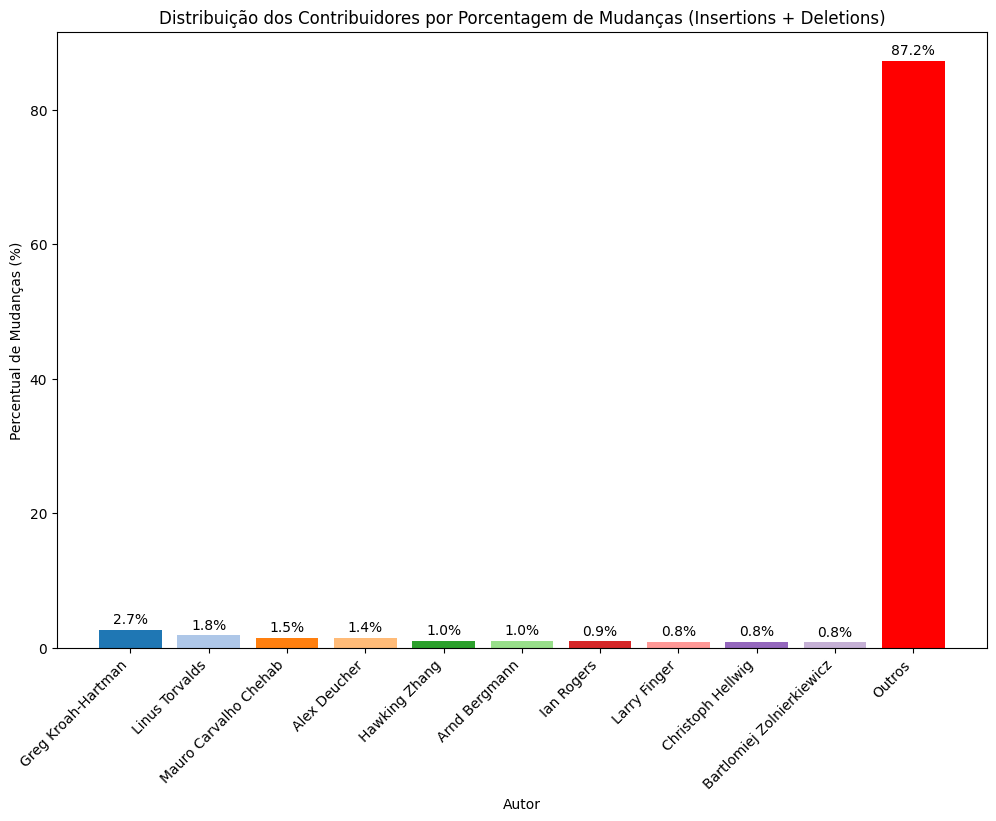

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
author_changes = db.groupby('author').agg({
    'insertions': 'sum',
    'deletions': 'sum'
}).reset_index()

author_changes['total_changes'] = author_changes['insertions'] + author_changes['deletions']
author_changes = author_changes[author_changes['author'] != '2.h']
top_authors_by_changes = author_changes.sort_values(by='total_changes', ascending=False).head(10)
total_changes_all_authors = author_changes['total_changes'].sum()
top_authors_by_changes['percent_changes'] = (top_authors_by_changes['total_changes'] / total_changes_all_authors) * 100
top_10_total_changes = top_authors_by_changes['total_changes'].sum()
others_percent = ((total_changes_all_authors - top_10_total_changes) / total_changes_all_authors) * 100
others_row = pd.DataFrame([{'author': 'Outros', 'total_changes': total_changes_all_authors - top_10_total_changes, 'percent_changes': others_percent}])
top_authors_with_others = pd.concat([top_authors_by_changes, others_row], ignore_index=True)

colors = list(plt.cm.tab20.colors[:len(top_authors_with_others)-1])
colors.append('red')
plt.figure(figsize=(12, 8))
bars = plt.bar(top_authors_with_others['author'], top_authors_with_others['percent_changes'], color=colors)
plt.xlabel('Autor')
plt.ylabel('Percentual de Mudanças (%)')
plt.title('Distribuição dos Contribuidores por Porcentagem de Mudanças (Insertions + Deletions)')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.show()




In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
total = db['author'].nunique()

print(f'Total: {total}')

Total: 34460


In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
total = db['email'].nunique()

print(f'Total: {total}')

Total: 35275


In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
autores_com_changes = db[db['files_changed'] == '[]']
total = autores_com_changes['author'].nunique()

print(f'total: {total}')


total: 7122


In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
total = db.nunique()

print(total)

hash              1314448
author              34460
email               35275
date              1253495
message           1235907
insertions           4056
deletions            2961
modified_files        307
files_changed      353612
dtype: int64


In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
merge_tag_count = db['message'].str.contains('merge tag', case=False, na=False).sum()
print(merge_tag_count)


37859


In [ ]:
import pandas as pd

db = pd.read_csv('dataframe/linux_kernel_commits_detailed.csv')
merge_tag_branch = db['message'].str.contains('merge branch', case=False, na=False).sum()
print(merge_tag_branch)


45376
